**GROUP 1 (EXPLORER) - Stage 1**

Anggota:

- Imam Maghfir Ramadhan
- Marcellinus Putra Wijaya
- Syaiful Adri
- St S Bintang Pratama Dumatubun
- Muhamad Zen Fikri
- Wasis Prasetyo
- Puspita Ayu Utami
- Putri Sausan

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
#READING DATA FROM GOOGLE DRIVE - WILL BE DELETED(?)

import os
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('/content/drive/MyDrive/Rakamin/Rakamin HW Dataset')
os.getcwd()

'/content/drive/MyDrive/Rakamin/Rakamin HW Dataset'

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 1.) Descriptive Statistics

In [217]:
# loading dataset
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [218]:
# checking the shape of the dataset
df.shape

(10000, 14)

In [219]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Semua tipe data sudah sesuai, tidak perlu mengubah tipe data

In [220]:
# cek missing value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Tidak ada data kosong (null value) pada dataset

In [221]:
# check data duplicated
df.duplicated().sum()

0

Tidak data yang duplikat

In [222]:
# Renaming
df.rename(columns={'Exited':'Churn'},inplace=True)

# Renaming the column 'Exited' to 'Churn
numericals = df[['CreditScore',	'Age', 'Tenure', 'Balance', 'EstimatedSalary']]
categorical = df[['Geography', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Gender', 'Churn']]
categorical_string = categorical.astype(str)

In [223]:
# statistics summary
numericals.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


In [224]:
categorical_string.describe(include = 'object')

,Geography,NumOfProducts,HasCrCard,IsActiveMember,Gender,Churn
count,10000,10000,10000,10000,10000,10000
unique,3,4,2,2,2,2
top,France,1,1,1,Male,0
freq,5014,5084,7055,5151,5457,7963


A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? <br>
- Semua tipe data pada dataset sudah sesuai, sedangkan untuk kolom 'exited' diganti dengan nama 'Churn' agar lebih informatif.

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br>
- Tidak terdapat missing value pada dataset

C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) <br>
- Berdasarkan data yang ada, kolom "balance" memiliki nilai summary yang cukup anomali. Hal ini dapat terlihat dari nilai mean dan mediannya yang cukup berbeda yang dimana mengindikasikan bahwa distribusi dari data ini tidak normal.

# **2.) Univariate Analysis**

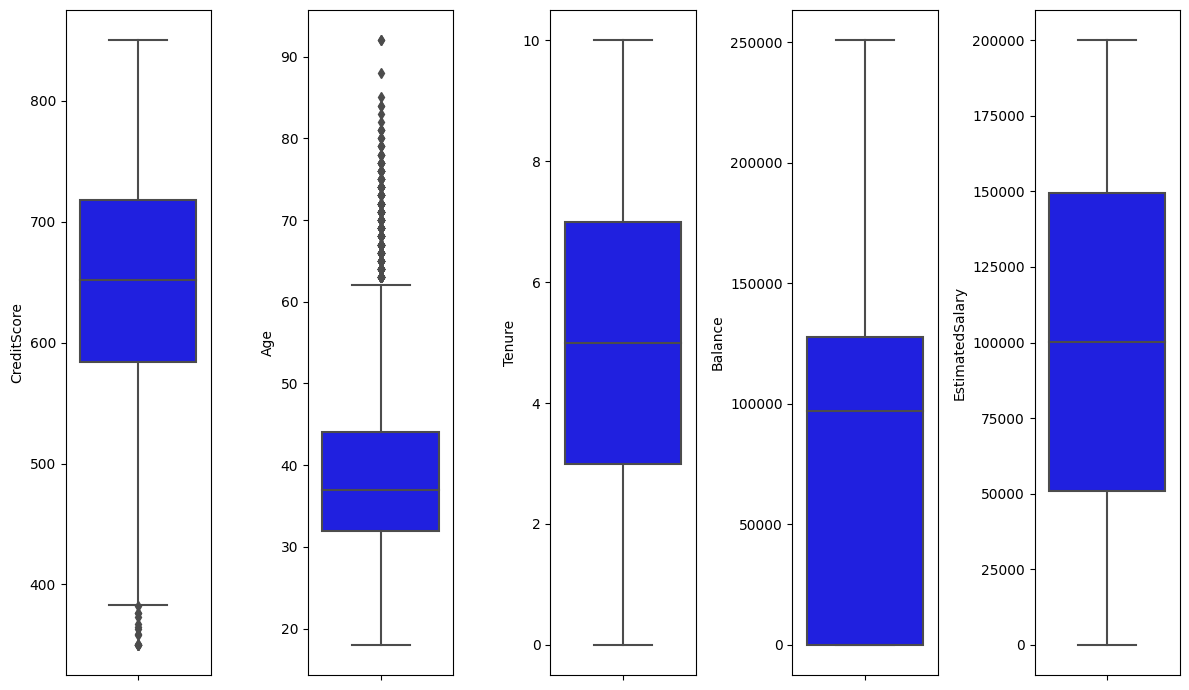

In [225]:
features = numericals.columns  # Mengambil nama kolom sebagai daftar fitur
plt.figure(figsize=(12,7))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=numericals[features[i]], color='blue', orient='v')
  plt.tight_layout()

plt.show()  # Untuk menampilkan plotnya

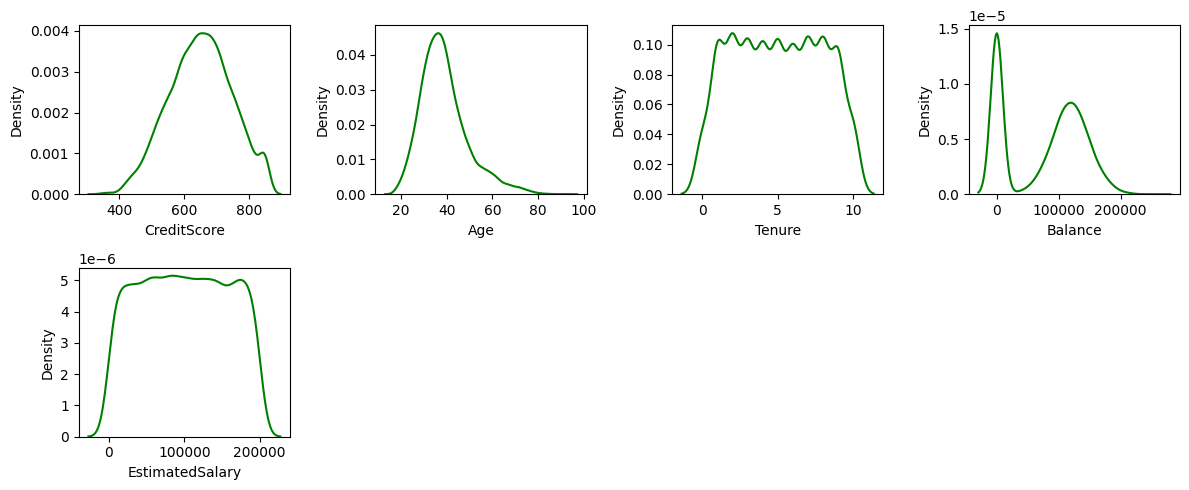

In [226]:
features = numericals.columns  # Mengambil nama kolom sebagai daftar fitur
plt.figure(figsize=(12,5))
for i in range(0, len(features)):
  plt.subplot(2, 4, i+1)
  sns.kdeplot(x = df[features[i]], color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

plt.show()  # Untuk menampilkan plotnya

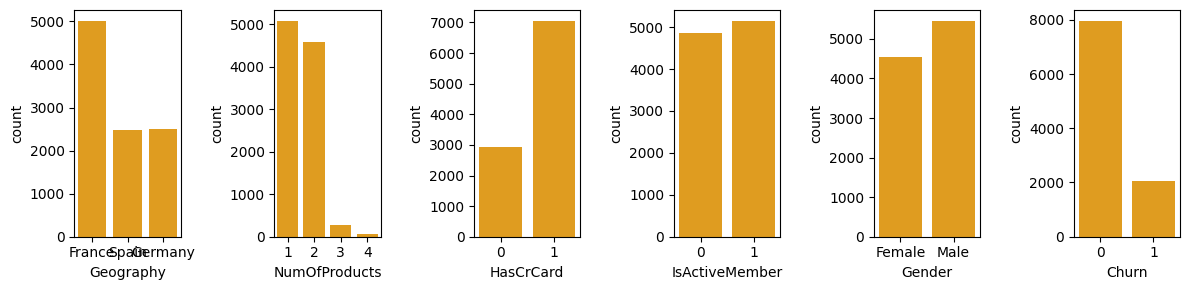

In [227]:
features = categorical.columns  # Mengambil nama kolom sebagai daftar fitur
plt.figure(figsize=(12,3))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.countplot(x=df[features[i]], color='orange')
  plt.tight_layout()

**Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing**

* Terlihat pada boxplot chart bahwa pada kolom 'creditscore', 'Age', 'NumOfProducts' terdapat outlier.
* Dari kdeplot yang menunjukkan skewness dari data tersebut, dapat terlihat bahwa sebagian besar kolom 'Age' cenderung positively skew. Sedangkan untuk kolom 'Balance'cenderung memiliki distribusi bimodal dan kolom 'NumOfProducts' cenderung memiliki distribusi multimodal.
* Dari kolom2 categorical yang ada dapat terlihat bahwa kolom  'Geography' didominasi oleh France, kolom 'Gender' didominasi oleh Male, Kolom 'Churn' lebih banyak yang tidak churn (value = 0), kolom 'HasCrCard' didomiasi oleh nasabah yang memiliki kartu kredit (value = 1), dan kolom 'IsActiveMember' didominasi oleh nasabah yang aktif.
* Untuk next step yang harus di follow up saat data pre-processing ialah handling data outlier, melakukan label encoding (untuk kolom 'gender', kolom 'usia' (dikategorikan menjadi dewasa dll), kolom 'negara' (melakukan one-hot encoding)), normalisasi, standarisasi, dan class imbalance.

# **3.) Multivariate Analysis**

<ipython-input-228-eaad15cc8429>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korelasi['Gender'] = korelasi['Gender'].map(map_gender)


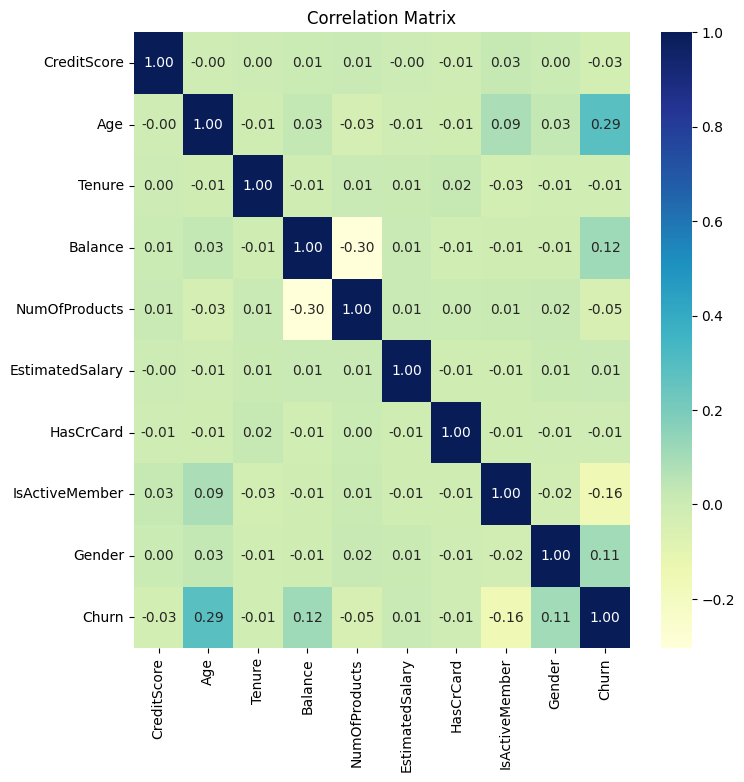

In [228]:
korelasi = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','HasCrCard','IsActiveMember','Gender','Churn']]
map_gender = {
    'Male':0,
    'Female':1,
}
korelasi['Gender'] = korelasi['Gender'].map(map_gender)
df_x = korelasi
plt.figure(figsize=(8,8))
sns.heatmap(df_x.corr(),annot=True,cmap='YlGnBu',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1500x1500 with 0 Axes>

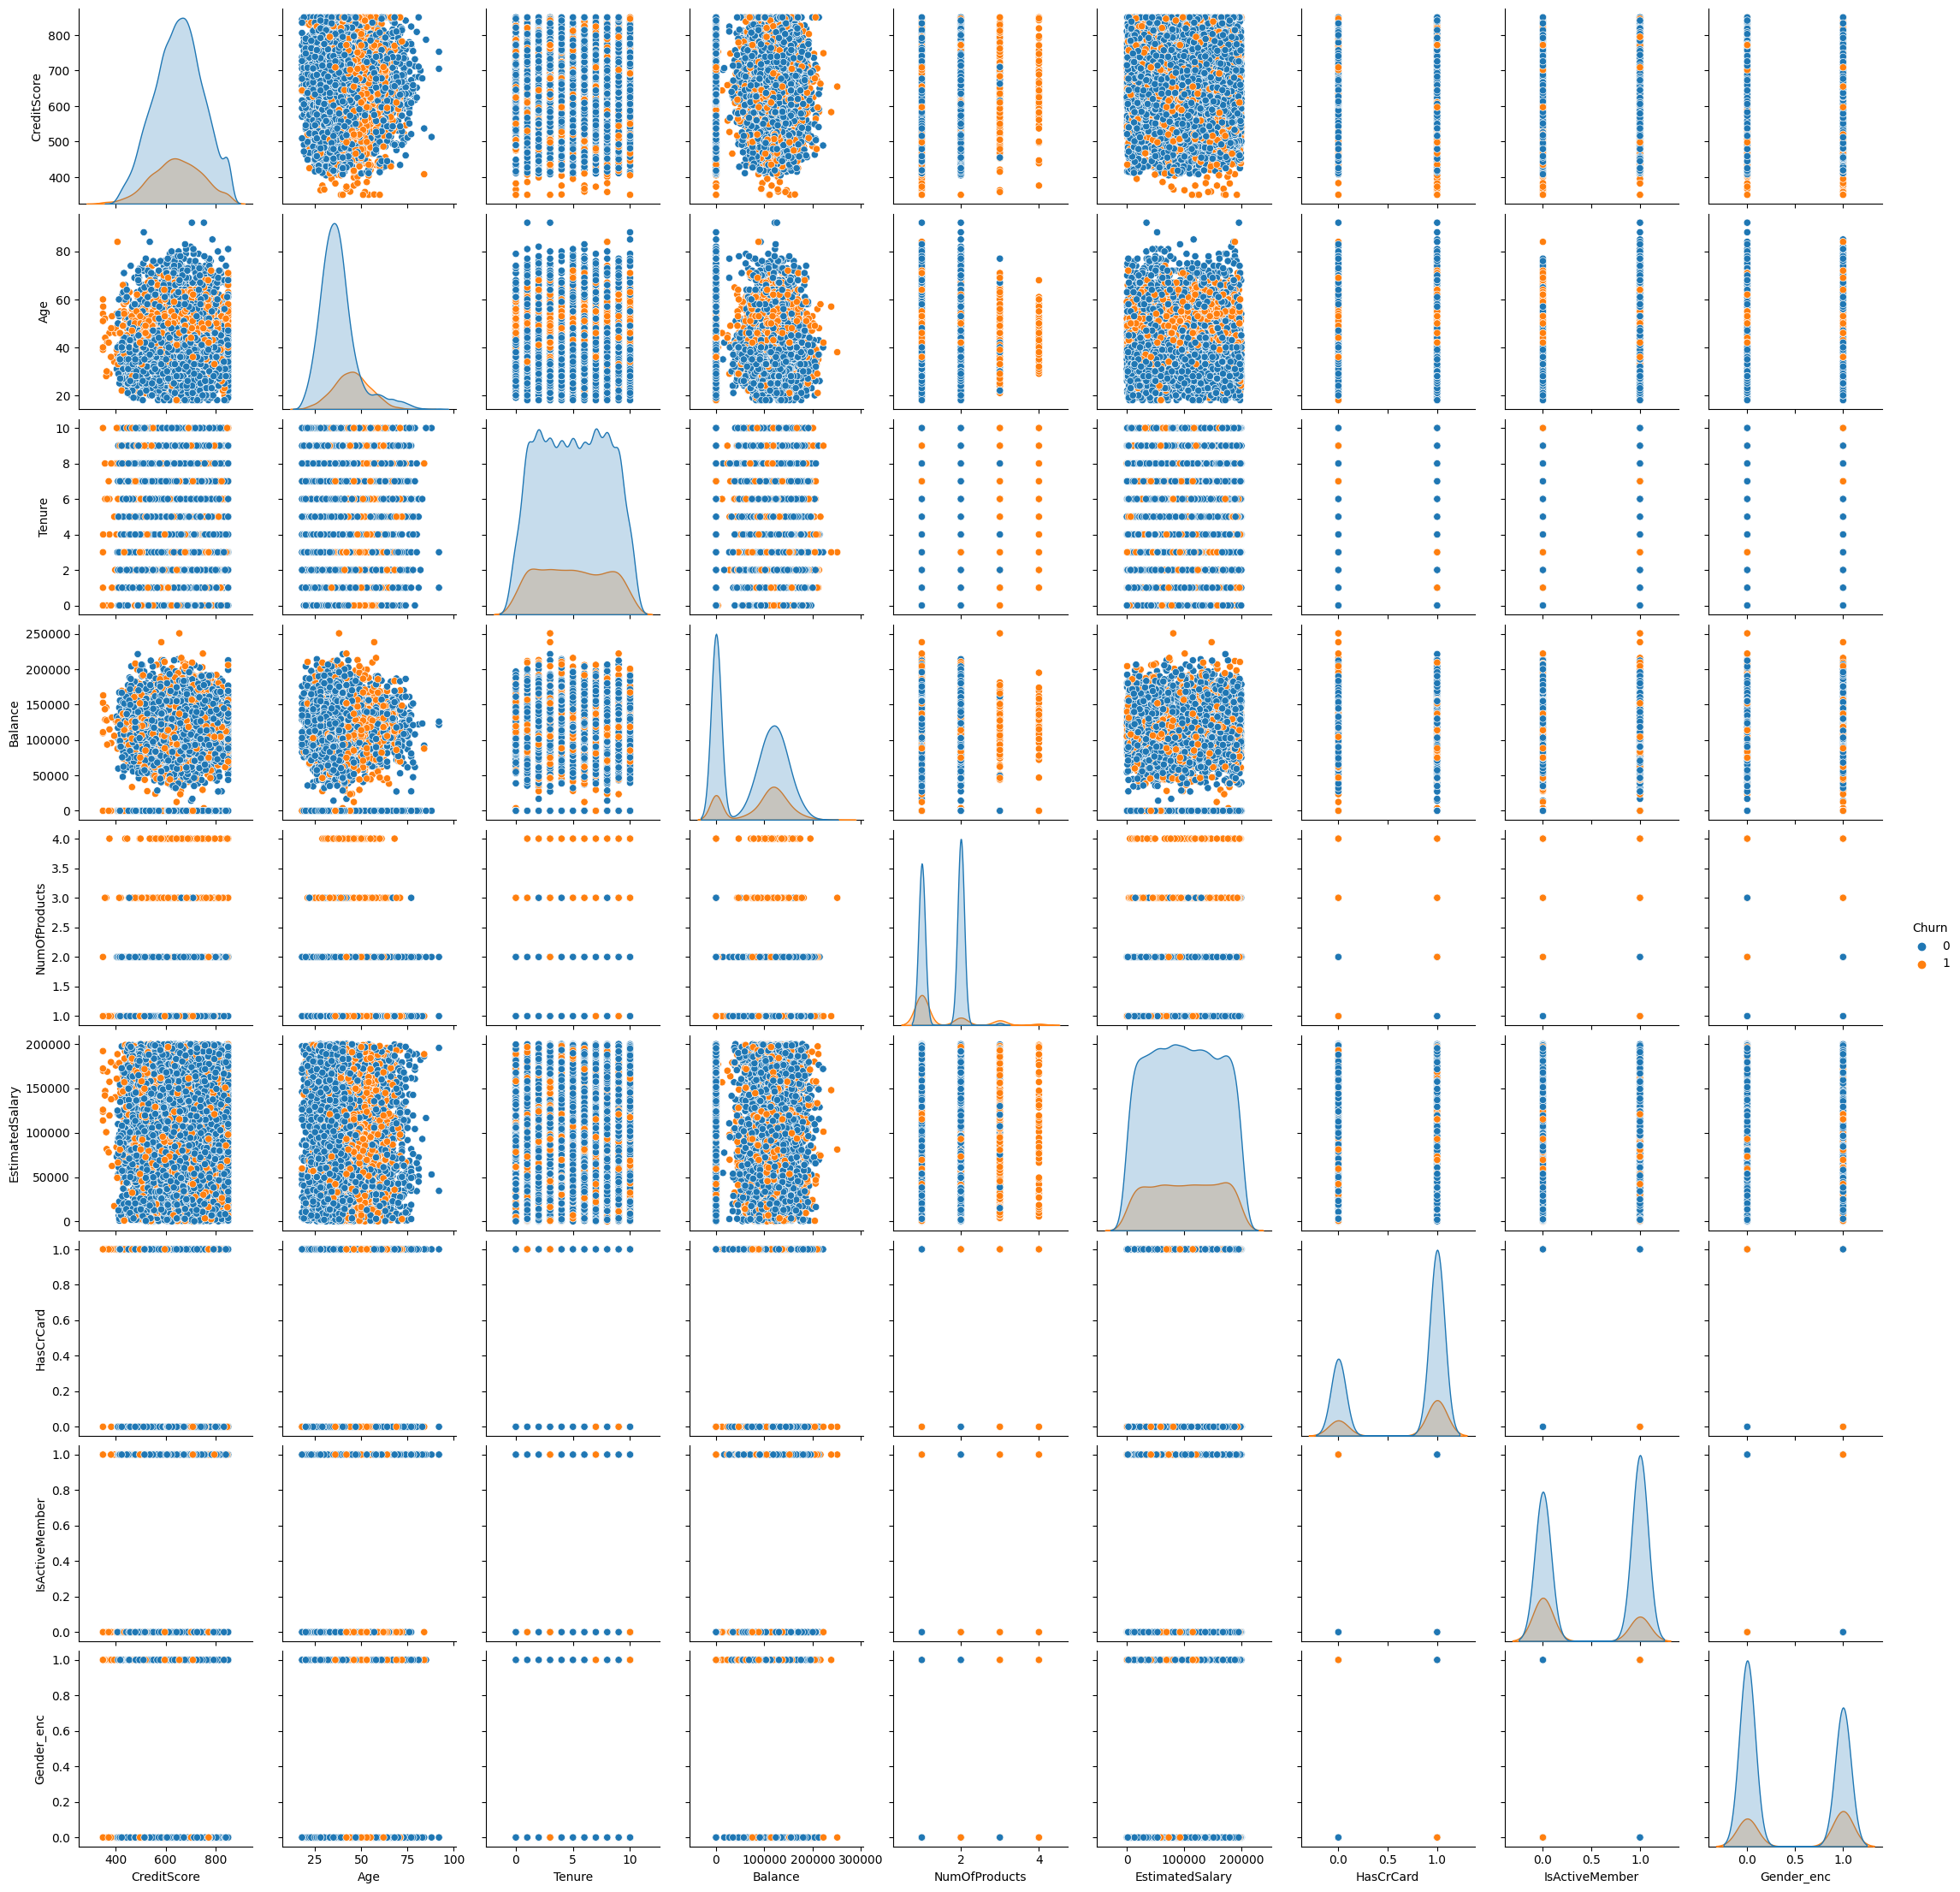

In [197]:
plt.figure(figsize=(15,15))
sns.pairplot(df_x, hue='Churn', diag_kind='kde')

In [198]:
df_x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Gender_enc,Churn
0,619,42,2,0.00,1,101348.88,1,1,1,1
1,608,41,1,83807.86,1,112542.58,0,1,1,0
2,502,42,8,159660.80,3,113931.57,1,0,1,1
3,699,39,1,0.00,2,93826.63,0,0,1,0
4,850,43,2,125510.82,1,79084.10,1,1,1,0


In [199]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Gender_enc
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1


<Axes: xlabel='IsActiveMember', ylabel='count'>

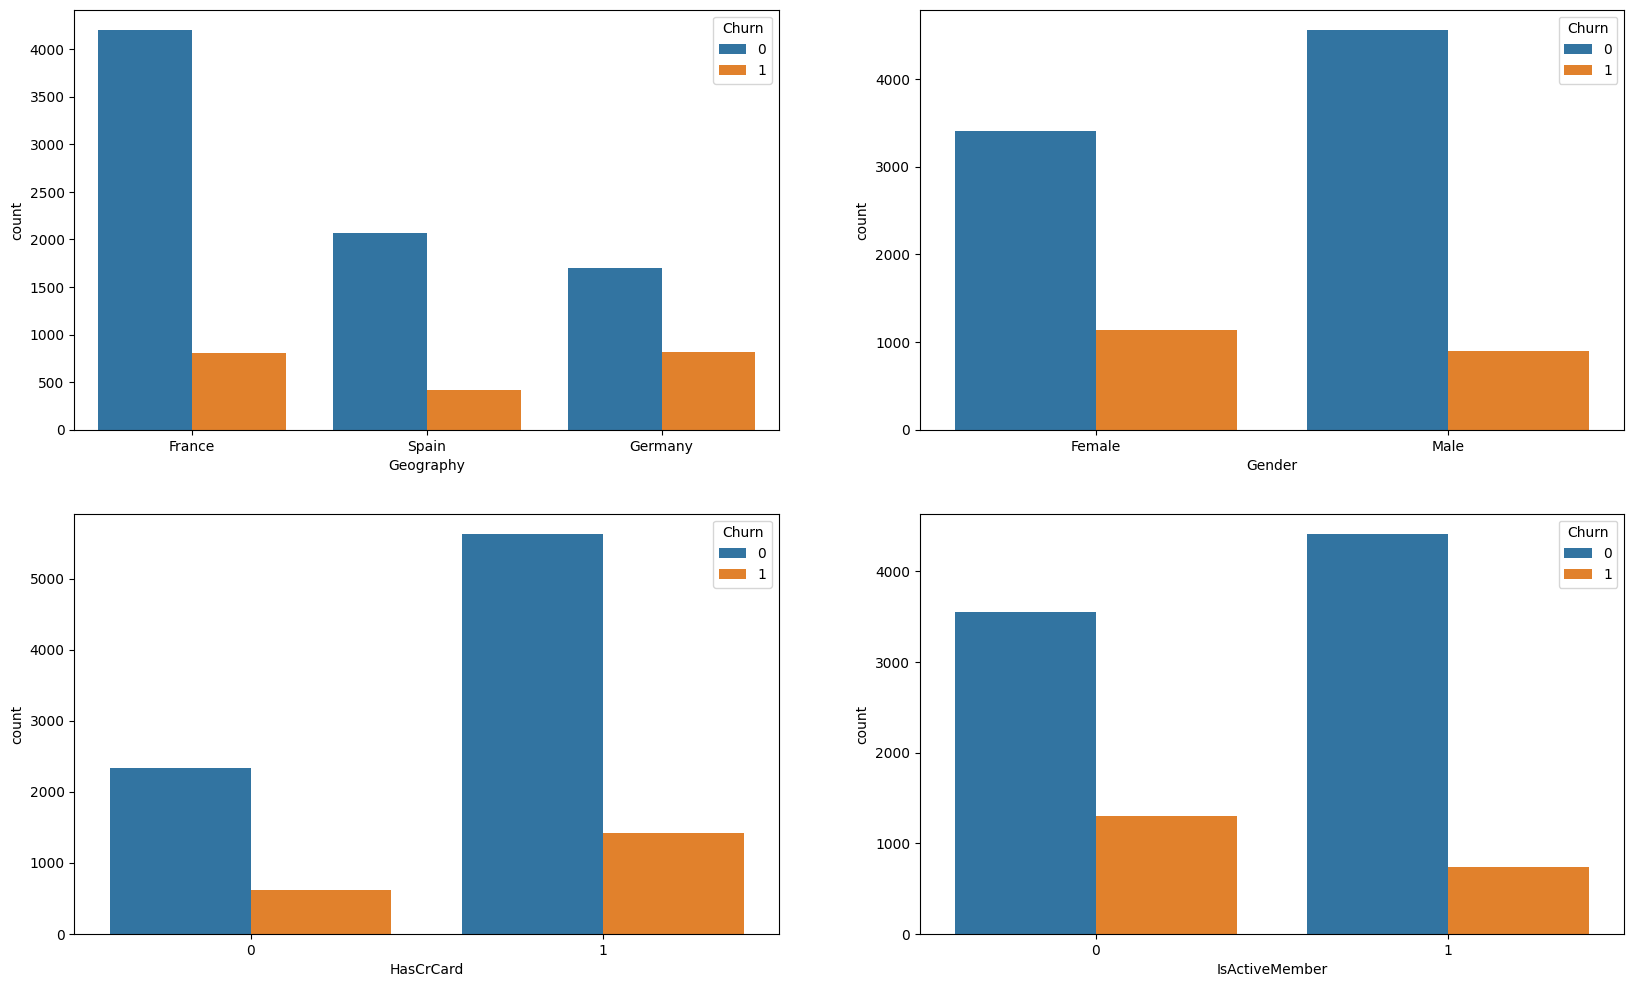

In [200]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Churn',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Churn',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Churn',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Churn',data = df, ax=axarr[1][1])

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
- Kolom "churn" memiliki korelasi positive yang moderate/menengah terhadap kolom "age" (korelasi = 0.29), "balance" (korelasi = 0.12), dan "Gender" (korelasi = 0.11). Sedangkan, pada kolom "IsActiveMember" (korelasi = -0.16) memiliki korelasi negative. Oleh karena itu, feature-feature tersebut harus dipertahanakan.
- Nasabah yang memiliki produk 3 & 4 cenderung churn

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
- Pada kolom "balance" juga memiliki korelasi negative (korelasi = -0.30) terhadap "NumOfProducts". Oleh karena itu, untuk feature ini diperlukan analisa multikolinearitas.


# 4.) Business Insight

Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan rekomendasinya untuk bisnis.

## 1. Kategori Umur Berdasarkan Customer yang Churned]

### a) Klasifikasi Umur

Menurut Kemenkes, usia terbagi menjadi kelompok berikut
- 0  - 11 tahun = Kanak-kanak (child)
- 12 - 25 tahun = Remaja (teenager)
- 26 - 45 tahun = Dewasa (adult)
- 46 - 65 tahun = Lansia (elderly)
- '> 65 tahun = Manula'

Link = https://jurnal.dpr.go.id/index.php/aspirasi/article/download/1589/pdf

In [201]:
#perubahan umur menjadi kelompok umur berdasarkan kemenkes
group_age = []
for age in df['Age'] :
    if age >= 0 and age <= 11 :
        age = 'child'
    elif age >= 12 and age <= 25 :
        age = 'teenager'
    elif age >= 26 and age <= 45 :
        age = 'adult'
    elif age >= 46 and age <= 65 :
        age = 'elderly'
    else :
        age = 'seniors'
    group_age.append(age)

#memasukkan kolom age baru yang telah diubah menjadi kategorikal
df['Group_Age'] = group_age
df['Group_Age'].value_counts()

adult       7278
elderly     1847
teenager     611
seniors      264
Name: Group_Age, dtype: int64

In [202]:
#diubah a b c... agar saat diplot urut
map_age = {
    'teenager' : 'a.teenager',
    'adult' : 'b.adult',
    'elderly': 'c.elderly',
    'seniors': 'd.seniors'
}
df['Group_Age'] = df['Group_Age'].map(map_age)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Gender_enc,Group_Age
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,b.adult
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,b.adult
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,b.adult
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,b.adult
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,b.adult


In [203]:
#menghitung unique value
df['Group_Age'].value_counts()

b.adult       7278
c.elderly     1847
a.teenager     611
d.seniors      264
Name: Group_Age, dtype: int64

In [204]:
#membuat fungsi pivot table agar langsung mendapatkan nilai persen customer
def tabel_pivot(x) : # x=nama kolom yang akan di group by

    #pivot table
    group1 = pd.pivot_table(data = df,
                            index = [x,'Churn'],
                            values = ['CreditScore'],
                            aggfunc = {'CreditScore':'count'}).reset_index()
    group1.columns = [x,'Churn','Total_Customer']

    #mendapatkan persentase total customer
    list_kosong=[]
    for a in group1[x].unique() :
        group = group1[group1[x] == a]
        total = group['Total_Customer'].sum()
        for b in range(len(group)) :
            group = group.reset_index(drop = True)
            isi = group['Total_Customer'][b]/total*100
            isi = round(isi,2)
            list_kosong.append(isi)
    group1['Persen_Customer1'] = list_kosong #total 100 persen kolom 'x'

    #sorting berdasarkan kolum churn
    group1 = group1.sort_values(by='Churn', ascending=True)

    list_kosong=[]
    for a in group1['Churn'].unique() :
        group = group1[group1['Churn'] == a]
        total = group['Total_Customer'].sum()
        for b in range(len(group)) :
            group = group.reset_index(drop = True)
            isi = group['Total_Customer'][b]/total*100
            isi = round(isi,2)
            list_kosong.append(isi)
    group1['Persen_Customer2'] = list_kosong #total 100 persen kolom churn

    #sorting dikembalikan lagi terhap kolom 'x'
    group1 = group1.sort_values(by=x, ascending=True)

    return group1,x

#memanggil fungsi tabel_pivot
group1,x = tabel_pivot('Group_Age')

In [205]:
#reshape group1
group1_reshape = group1.pivot_table(index = x,
                                    columns = 'Churn',
                                    values = 'Persen_Customer1')

In [206]:
display(group1)
display(group1_reshape)

,Group_Age,Churn,Total_Customer,Persen_Customer1,Persen_Customer2
0,a.teenager,0,565,92.47,7.10
1,a.teenager,1,46,7.53,2.26
2,b.adult,0,6244,85.79,78.41
3,b.adult,1,1034,14.21,50.76
4,c.elderly,0,925,50.08,11.62
5,c.elderly,1,922,49.92,45.26
6,d.seniors,0,229,86.74,2.88
7,d.seniors,1,35,13.26,1.72


Churn,0,1
Group_Age,,
a.teenager,92.47,7.53
b.adult,85.79,14.21
c.elderly,50.08,49.92
d.seniors,86.74,13.26


### Visualisasi

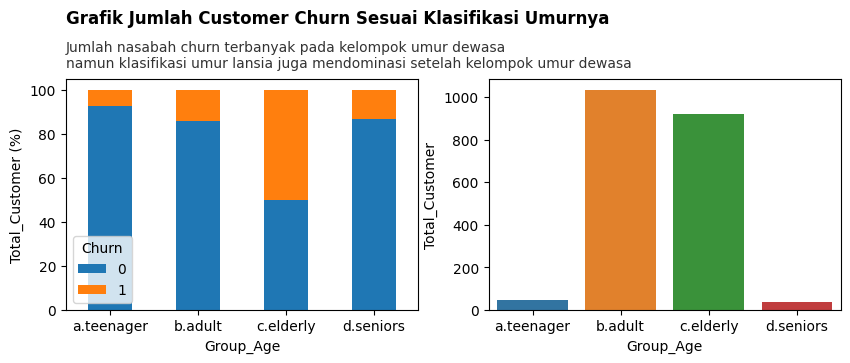

In [207]:
fig, ax = plt.subplots(1,2, figsize = (10,3),sharex=False)

group1_reshape.plot(kind = 'bar', stacked =True, ax=ax[0])
sns.barplot(data=group1[group1['Churn']==1], x='Group_Age', y='Total_Customer')

for tick in ax[0].get_xticklabels():
    tick.set_rotation(360)

#setting
ax[0].set_title('Grafik Jumlah Customer Churn Sesuai Klasifikasi Umurnya',
                loc = 'left' ,pad = 40,fontweight = 'bold')
ax[0].set_ylabel('Total_Customer (%)')
ax[0].set_xlabel('Group_Age')
#subtitle
sub_title = str("Jumlah nasabah churn terbanyak pada kelompok umur dewasa" +
            "\nnamun klasifikasi umur lansia juga mendominasi setelah kelompok umur dewasa ")

x_start, x_end = ax[1].get_xlim()
y_start, y_end = ax[0].get_ylim()
ax[0].text(x=x_start ,y = y_end*1.05
            ,s = sub_title
            ,ha= 'left',alpha = 0.8)

plt.show()


### Keterangan :

Dapat terlihat bahwa customer `churn` kebanyakan berada di **usia 26 - 45 (Adults) dan 46 - 65 (Elderly)** dibandingkan dengan usia yang lebih muda. Hal ini bisa saja disebabkan oleh preferensi servis dari setiap kategori umur. Oleh karena itu, bank direkomendasi kan untuk me-review kembali targeted nasabah ini dan bisa membuat strategi khusus dapat berupa program atau promo khusus untuk nasabah tersebut.

## 2. Keaktifan Member Berdasarkan Customer yang Churned

In [208]:
#memanggil fungsi tabel_pivot
group1,x = tabel_pivot('IsActiveMember')
#reshape group1
group1_reshape = group1.pivot_table(index = 'Churn',
                                    columns = x,
                                    values = 'Persen_Customer2')

In [209]:
display(group1)
display(group1_reshape)

,IsActiveMember,Churn,Total_Customer,Persen_Customer1,Persen_Customer2
0,0,0,3547,73.15,44.54
1,0,1,1302,26.85,63.92
2,1,0,4416,85.73,55.46
3,1,1,735,14.27,36.08


IsActiveMember,0,1
Churn,,
0,44.54,55.46
1,63.92,36.08


### Visualisasi

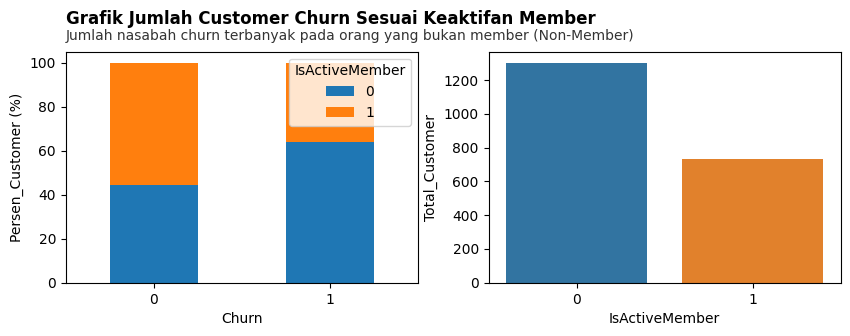

In [210]:
fig, ax = plt.subplots(1,2, figsize = (10,3),sharex=False)

group1_reshape.plot(kind = 'bar', stacked =True, ax=ax[0])
sns.barplot(data=group1[group1['Churn']==1], x=x, y='Total_Customer')

for tick in ax[0].get_xticklabels():
    tick.set_rotation(360)

#setting
ax[0].set_title('Grafik Jumlah Customer Churn Sesuai Keaktifan Member',
                loc = 'left' ,pad = 20,fontweight = 'bold')
ax[0].set_ylabel('Persen_Customer (%)')
ax[0].set_xlabel('Churn')
#subtitle
sub_title = str("Jumlah nasabah churn terbanyak pada orang yang bukan member (Non-Member)")

x_start, x_end = ax[1].get_xlim()
y_start, y_end = ax[0].get_ylim()
ax[0].text(x=x_start ,y = y_end*1.05
            ,s = sub_title
            ,ha= 'left',alpha = 0.8)

plt.show()


### Keterangan :
Kebanyakan customer yang `churn` ialah customer yang **bukan member yang aktif**. Oleh karena itu, direkomendasikan untuk bank membuat sebuah program yang dimana dapat membuat member yang tidak aktif ini untuk menjadi aktif untuk menghindari customer menjadi churn

## 3. Kategori Gender Berdasarkan Customer yang Churned

In [211]:
#memanggil fungsi tabel_pivot
group1,x = tabel_pivot('Gender')
#reshape group1
group1_reshape = group1.pivot_table(index = 'Churn',
                                    columns = x,
                                    values = 'Persen_Customer2')

In [212]:
display(group1)
display(group1_reshape)

,Gender,Churn,Total_Customer,Persen_Customer1,Persen_Customer2
0,Female,0,3404,74.93,42.75
1,Female,1,1139,25.07,55.92
2,Male,0,4559,83.54,57.25
3,Male,1,898,16.46,44.08


Gender,Female,Male
Churn,,
0,42.75,57.25
1,55.92,44.08


### Visualisasi

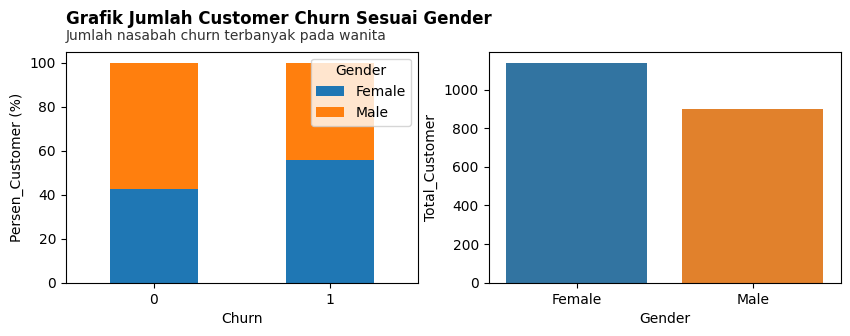

In [213]:
fig, ax = plt.subplots(1,2, figsize = (10,3),sharex=False)

group1_reshape.plot(kind = 'bar', stacked =True, ax=ax[0])
sns.barplot(data=group1[group1['Churn']==1], x=x, y='Total_Customer')

for tick in ax[0].get_xticklabels():
    tick.set_rotation(360)

#setting
ax[0].set_title('Grafik Jumlah Customer Churn Sesuai Gender',
                loc = 'left' ,pad = 20,fontweight = 'bold')
ax[0].set_ylabel('Persen_Customer (%)')
ax[0].set_xlabel('Churn')
#subtitle
sub_title = str("Jumlah nasabah churn terbanyak pada wanita")

x_start, x_end = ax[1].get_xlim()
y_start, y_end = ax[0].get_ylim()
ax[0].text(x=x_start ,y = y_end*1.05
            ,s = sub_title
            ,ha= 'left',alpha = 0.8)

plt.show()